## Анализ данных из Росстат

In [1]:
%pip install openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.0 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/250.0 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/250.0 kB 435.7 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/250.0 kB 164.3 kB/s eta 0:00:02
   ------------ -------------------------- 81.9/250.0 kB 286.7 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.0 kB 364.4 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.0 kB 364.4 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/250.0 kB 300.4 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.0 kB 388.2 kB/s eta 0:00:01
   ---------------------------------- --- 225.3/250.0 kB 458.5 kB/s eta 0:00:01
   -------------------------------------- 250.0/250.0 kB 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# загружаем данные из таблицы эксель
df_0 = pd.read_excel("data/sred_potreb_cen_1991-2023.xlsx", sheet_name='1', skiprows=2, decimal=',')
df_0.head(10)

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Средние потребительские цены на отдельные виды...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17,519.83
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92,344.82
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22,227.58
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16,513.77
5,Консервы мясные3),8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,94.42,117.04,121.37,125.21,130.13,139.47,153.5,167.04,580.06,603.15
6,Рыба мороженая неразделанная4),2.32,129.5,1088.73,3675.17,8325,9398,9912,18.93,23.83,...,110.65,138.16,147.68,153.03,152.14,170.13,181.08,192.61,207.56,227.37
7,"Рыба соленая, маринованная, копченая",5.72,272.6,2598.96,7495.95,17488,19912,21402,32.13,47.89,...,292.21,352.58,382.54,388.83,398.24,424.54,453.54,525.66,597.77,629.34
8,Консервы рыбные натуральные и с добавлением ма...,3.91,120,1040.71,3211.18,8050,8540,8468,13.85,19.96,...,70.12,91.94,103.94,109.09,113.71,119.69,135.03,156.01,534.69,548.64
9,Масло сливочное 6),12.24,413,2912.58,12984.99,20075,22968,23238,64.44,66.83,...,357.54,397.75,477.13,528.83,553.02,613.39,638.69,719.21,835.77,862.87


- Очистка данных

In [8]:
# удаление строк с пустыми значениями 
df_1 = df_0.dropna()
df_1.head()

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547,14137,15787,30.04,42.01,...,272.28,314.94,315.02,320.34,330.58,350.05,361.04,416.46,484.17,519.83
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053,16810,19055,33.99,43.37,...,272.36,271.08,264.32,255.87,275.26,264.55,269.14,311.84,307.92,344.82
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587,13815,16061,30.74,39.28,...,136.14,133.73,138.49,126.29,151.27,143.13,145.55,183.54,178.22,227.58
4,Колбаса вареная2),17,271,3351.3,8984.1,20016,22859,26767,43.81,61.56,...,310.54,344.81,351.27,360.88,382.98,399.37,406.84,450.57,480.16,513.77
5,Консервы мясные3),8.87,163.9,1165.48,2991.46,6692,7375,7811,15.5,18.16,...,94.42,117.04,121.37,125.21,130.13,139.47,153.5,167.04,580.06,603.15


In [9]:
df_1.shape

(86, 34)

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1991 to 2023
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 33 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  33 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    33 non-null     float64
 3   Колбаса вареная2)                                                                                 33 non-null     float64
 4   Консервы мясные3)                                                                                 33 non-null     float64
 5   Рыб

In [11]:
# транспонирование 
df_1 = df_1.T
df_1.head()

,1,2,3,4,5,6,7,8,9,10,...,79,80,81,82,83,84,85,86,87,88
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови39)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [12]:
df_1.index

Index([' ПОКАЗАТЕЛИ ',           1991,           1992,           1993,
                 1994,           1995,           1996,           1997,
                 1998,           1999,           2000,           2001,
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020,           2021,
                 2022,           2023],
      dtype='object')

In [13]:
# ключами делаем категории товаров и услуг
df_1.columns = df_1.loc[' ПОКАЗАТЕЛИ ', :]
df_1.head()

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления35), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови39)
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови39)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18


In [15]:
# удаление строки
df_1 = df_1.drop(' ПОКАЗАТЕЛИ ')
df_1.head()

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления35), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови39)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,…,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,…,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,…,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12984.99,5306.54,...,…,64.66,2682.71,1972.56,3186.69,955.52,35615.39,25380.81,7016.21,3470.18
1995,12547,15053,11587,20016,6692,8325,17488,8050,20075,10460,...,…,951,8077,3886,6185,2638,90428,60847,20704,10471


In [19]:
df_1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры твердые, полутвердые и мягкие9)', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов10)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта11)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка 12), за л', 'Коньяк ординарный отечественный13), за  л',
       'Вино игристое отечественное14), за  л', 'Пиво15), за л',
       'Пальто (полупальто) женское с в

In [18]:
# удаление лишних символов пробела перед и после названий ключей
df_1.columns = df_1.columns.str.strip(" ")

In [20]:
# попытка конвертации данных в тип float
df_1 = df_1.astype("float")

ValueError: could not convert string to float: '…'

In [21]:
# замена '…' на 0
df_1 = df_1.replace('…', 0)

C:\Users\User\AppData\Local\Temp\ipykernel_13176\3477135367.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1 = df_1.replace('…', 0)


In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1991 to 2023
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 33 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  33 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    33 non-null     float64
 3   Колбаса вареная2)                                                                                 33 non-null     float64
 4   Консервы мясные3)                                                                                 33 non-null     float64
 5   Рыб

In [24]:
# проверка столбца с ключом "Сыры твердые, полутвердые и мягкие9)"
df_1["Сыры твердые, полутвердые и мягкие9)"].unique()

array([13.2, 415, 2756.82, 8583.13, 22514, 24828, 27025, 56.33, 74.32,
       85.17, 103.06, 102.67, 111.95, 122.3, 138.72, 144.26, 233.93,
       212.92, 213.11, 263.2, 273.43, 272.57, 326.89, 388.81, 418.61,
       461.71, 478.88, 502.55, 552.03, 590.39, 641.22, 756.74, '780.06'],
      dtype=object)

In [25]:
# проверка столбца с ключом "Водка 12), за л"
df_1["Водка 12), за л"].unique()

array([22.61, 499.6, 4277.85, 8466.72, 20230, 35365, 38113, 46.97, 64.84,
       84.05, 94.76, 102.54, 116.45, 134.94, 148.89, 166.04, 181.66,
       203.02, 213.84, 230.22, 256.21, 315.45, 406.51, 547.02, 559.21,
       583, 600.59, 604.26, 615.57, 631.08, 643.07, 678.26, '699.25'],
      dtype=object)

In [26]:
# проверка столбца с ключом "Еврошифер21), за 10 м2"
df_1["Еврошифер21), за 10 м2"].unique()

array([0, '...', 31986.77, 99732, 118529, 126831, 139.32, 213.93, 269.5,
       335.63, 398.32, 460.27, 508.15, 646.24, 734.86, 913.71, 1142.04,
       1144.83, 1154.66, 1232.19, 1289.04, 1368.75, 1425.95, 1494.21,
       1535.18, 2717.7, 2752.78, 2949.49, 3109.3, 4151.1, 4460.36, 4586.8],
      dtype=object)

In [27]:
# замена '...' на 0
df_1 = df_1.replace('...', 0)

C:\Users\User\AppData\Local\Temp\ipykernel_13176\1662795286.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1 = df_1.replace('...', 0)


In [29]:
# вторая попытка конвертации данных в тип float
df_1 = df_1.astype("float")

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1991 to 2023
Data columns (total 86 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Говядина (кроме бескостного мяса)                                                                 33 non-null     float64
 1   Свинина (кроме бескостного мяса)                                                                  33 non-null     float64
 2   Куры охлажденные и мороженые1)                                                                    33 non-null     float64
 3   Колбаса вареная2)                                                                                 33 non-null     float64
 4   Консервы мясные3)                                                                                 33 non-null     float64
 5   Рыб

In [31]:
df_1["Еврошифер21), за 10 м2"].unique()

array([     0.  ,  31986.77,  99732.  , 118529.  , 126831.  ,    139.32,
          213.93,    269.5 ,    335.63,    398.32,    460.27,    508.15,
          646.24,    734.86,    913.71,   1142.04,   1144.83,   1154.66,
         1232.19,   1289.04,   1368.75,   1425.95,   1494.21,   1535.18,
         2717.7 ,   2752.78,   2949.49,   3109.3 ,   4151.1 ,   4460.36,
         4586.8 ])

In [32]:
# сохранение в виде эксель
df_1.to_excel("data/my_rosstat.xlsx")

- Анализ

In [35]:
df_1['Говядина (кроме бескостного мяса)']

1991       15.54
1992      221.50
1993     2201.27
1994     5186.28
1995    12547.00
1996    14137.00
1997    15787.00
1998       30.04
1999       42.01
2000       52.72
2001       70.33
2002       72.56
2003       73.90
2004       93.41
2005      115.77
2006      131.67
2007      139.49
2008      174.86
2009      185.60
2010      197.64
2011      234.49
2012      248.47
2013      244.55
2014      272.28
2015      314.94
2016      315.02
2017      320.34
2018      330.58
2019      350.05
2020      361.04
2021      416.46
2022      484.17
2023      519.83
Name: Говядина (кроме бескостного мяса), dtype: float64

In [36]:
# срез датафрейма
df_2 = df_1.loc[1998:, :]
df_2.head()

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),Консервы мясные3),Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением масла5),Масло сливочное 6),"Масло подсолнечное7), за л",...,"Отопление, за Гкал","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления35), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день36)","Санаторий37), за день","Дом отдыха, пансионат38), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови39)
1998,30.04,33.99,30.74,43.81,15.50,18.93,32.13,13.85,64.44,23.43,...,0.0,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.90,24.40
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,0.0,4.31,25.40,13.09,25.12,7.90,264.25,197.90,52.67,31.22
2000,52.72,58.45,48.80,77.97,19.52,29.54,61.22,21.15,69.12,23.20,...,0.0,5.66,39.16,23.11,33.60,9.19,351.35,279.76,62.97,37.99
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,0.0,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.60,46.89
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,0.0,9.47,70.85,48.66,61.77,15.50,551.39,426.89,99.77,59.21


In [37]:
# в сколько раз изменилась средняя цена за весь период
product = 'Яйца куриные, за 10 шт.'

df_2.loc[2023, product] / df_2.loc[1998, product]


8.865461847389557

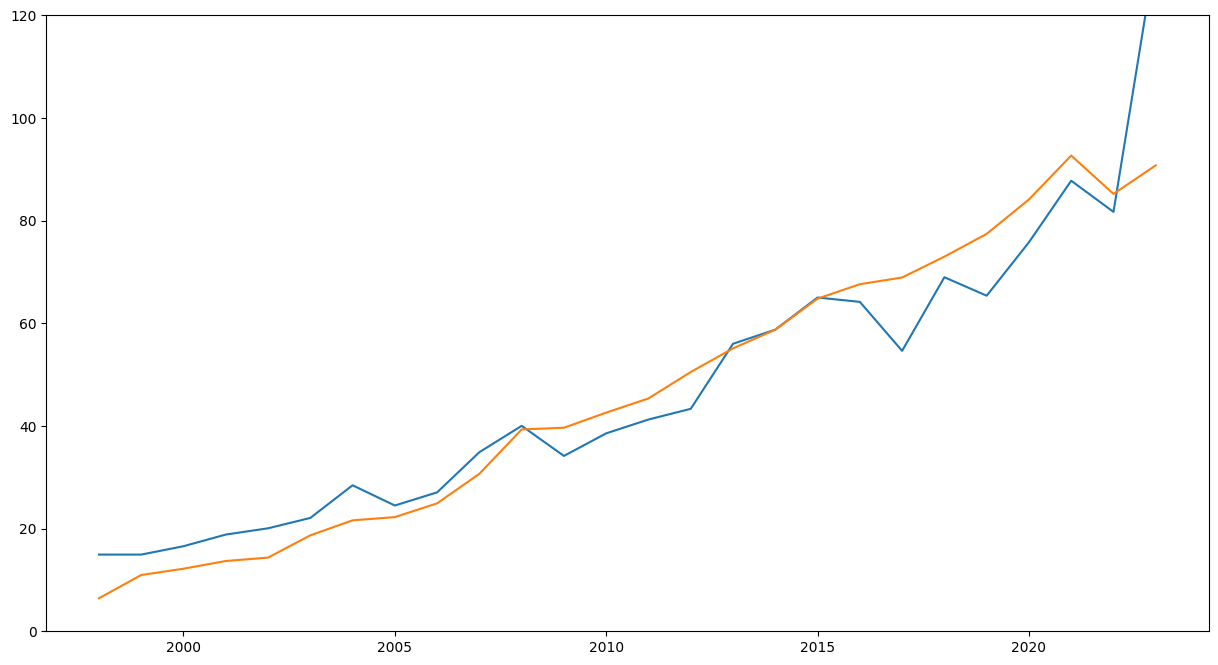

In [43]:
# графики динамики изменения средних цен

plt.figure(figsize=(15,8))

plt.plot(df_2.index, df_2['Яйца куриные, за 10 шт.'])
plt.plot(df_2.index, df_2['Хлеб и булочные изделия из пшеничной муки различных сортов10)'])

plt.ylim([0, 120])
plt.show()

In [34]:
df_1.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3)', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла5)',
       'Масло сливочное 6)', 'Масло подсолнечное7), за л',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности8), за л',
       'Сыры твердые, полутвердые и мягкие9)', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки различных сортов10)',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта11)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка 12), за л', 'Коньяк ординарный отечественный13), за  л',
       'Вино игристое отечественное14), за  л', 'Пиво15), за л',
       'Пальто (полупальто) женское с в